In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

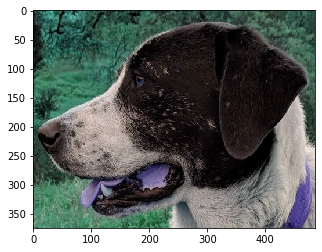

In [2]:
img = cv2.imread('../meta/sammy_face.jpg')
plt.imshow(img)

**CHOOSING THRESHOLDS**

In [3]:
med_val = np.median(img) 
lower = int(max(0, 0.7* med_val))
print(lower)
upper = int(min(255,1.3 * med_val))
print(upper)

44
83


# Canny Edge Detection

In [4]:
def plot_edges(ax, th1, th2):
    edges = cv2.Canny(image=img, threshold1=th1 , threshold2=th2)
    ax.imshow(edges)
    ax.set_title(f'{th1}-{th2}')
    ax.set_axis_off()

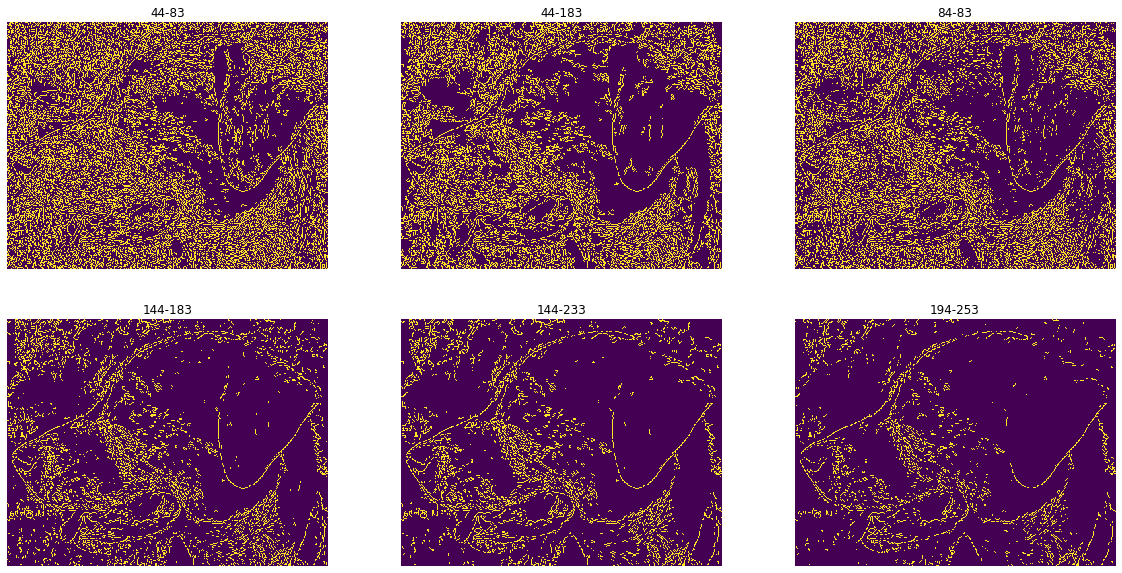

In [5]:
thresholds = [
    (lower, upper), (lower, upper+100), (lower+40, upper), 
    (lower+100, upper+100), (lower+100, upper+150), (lower+150, upper+170)
]

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, th in enumerate(thresholds):
    plot_edges(ax[i//3][i%3], th[0], th[1])

 # Manual Blurring before Edge Detection


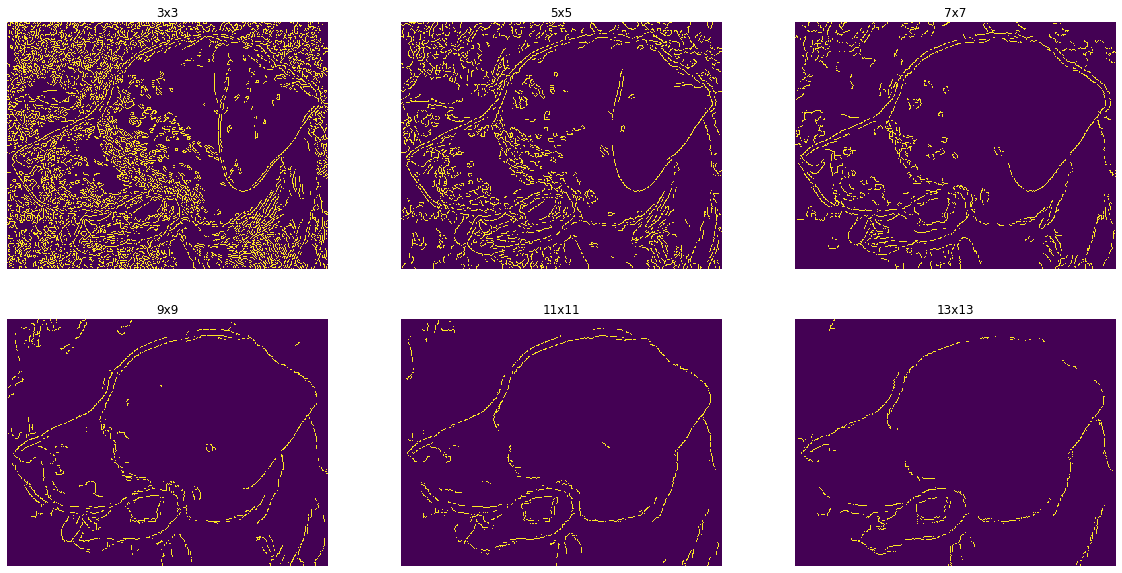

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, k in enumerate([3, 5, 7, 9, 11, 13]):
    blurred_img = cv2.blur(img,ksize=(k,k))
    edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
    ax[i//3][i%3].set_title(f"{k}x{k}")
    ax[i//3][i%3].imshow(edges)
    ax[i//3][i%3].set_axis_off()